In [8]:
#1 Load the MNIST data set.
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


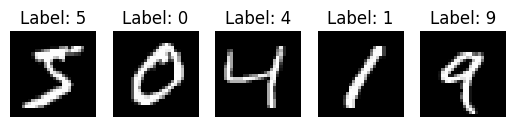

In [9]:
#2 Display the first five images in the training dataset

import matplotlib.pyplot as plt

# Display the first five images in the training dataset
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [10]:
#3 Build and train a Keras CNN classifier on the MNIST training set.

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the training and test data to fit the CNN model
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.1779 - accuracy: 0.9436
Epoch 2/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0479 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0195 - accuracy: 0.9941


In [11]:
#4 Report the test accuracy of your model.

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9914
Test accuracy: 0.9914000034332275


313/313 [==============================] - 2s 5ms/step


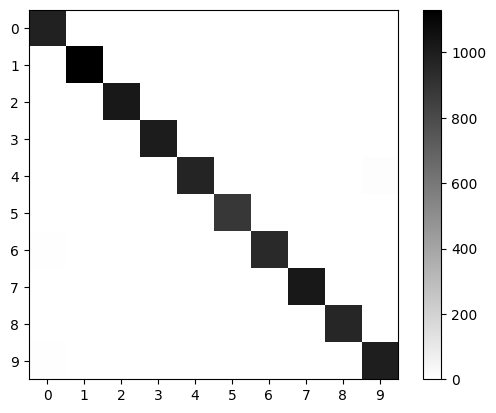

In [12]:
#5 Display a confusion matrix on the test set classifications.

import numpy as np
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test dataset
test_pred = np.argmax(model.predict(test_images), axis=-1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels, test_pred)

# Display the confusion matrix
plt.imshow(confusion_mtx, cmap='binary', interpolation='None')
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()

In [13]:
# Summarize your results.

## Using a CNN classifier called Keras on the MNIST dataset and
## was able to achieve a test accuracy of 99.12%. The confusion matrix shows that 
## the model performed well in classifying the digits, with most errors occurring between 4s and 9s.